
# Veri Analitiğine Başlangıç (3 Saatlik Atölye)
Bu notebook, veri analitiği yolculuğuna giriş yapanlar için teorik açıklamalar, formüller ve hem basit hem de ileri seviye kod örneklerini bir araya getirir. Her fonksiyon önce tek başına gösterilir, ardından gerçek bir analitik senaryoda nasıl zincirlenebileceği anlatılır.



## Atölye Akışı ve Süre Planı
| Süre (dk) | Tema | İçerik |
| --- | --- | --- |
| 0-20 | Perspektif | Veri analitiği süreci, roller, temel kavramlar |
| 20-50 | Araç Tanıtımı | `numpy`, `pandas`, `seaborn`, veri yapıları |
| 50-90 | Keşifsel Analiz | Veri inceleme fonksiyonları, veri kalitesi metrikleri |
| 90-120 | Özellik Geliştirme | Filtreleme, toplulaştırma, feature engineering |
| 120-150 | Görselleştirme | Grafik seçimi, estetik ayarları, yoruma hazır çıktılar |
| 150-180 | Sonuç + Alıştırmalar | Basit modelleme, çıkarımlar ve egzersizler |



## Öğrenme Hedefleri
1. Veri analitiği sürecinin aşamalarını açıklayabilmek.
2. `pandas` ve `numpy` fonksiyonlarının temel ve kompleks kullanım senaryolarını görmek.
3. Toplulaştırma, özellik oluşturma ve görselleştirme adımlarını matematiksel temeliyle ilişkilendirmek.
4. Temel istatistiksel ölçüleri formülleriyle yorumlayıp karar mesajına dönüştürmek.
5. Basit bir regresyon modeliyle içgörü üretip hikayeleştirmek.



## Veri Analitiği Sürecinin Teorik Çerçevesi
- **Problemi Tanımla:** İş veya araştırma sorusunu ölçülebilir hale getir.
- **Veriyi Topla:** Kaynak güvenilirliğini, örneklemenin temsil gücünü değerlendir.
- **Temizle ve Hazırla:** Eksik değerler, aykırı değerler ve veri türleri üzerine çalış.
- **Keşfet ve Model Kur:** Örüntüleri görmek için istatistiksel özetler, görselleştirmeler ve gerekirse modeller kur.
- **İlet ve Yaygınlaştır:** Bulduklarını hikayeleştir; karar alıcıların ihtiyaç duyduğu metrikleri vurgula.



## Kullanacağımız Araçlar ve Fonksiyon Kategorileri
- **`numpy`**: Vektörleştirilmiş hesap, rastgele sayı üretimi, temel istatistikler.
- **`pandas`**: `DataFrame`, `Series`, `head`, `info`, `describe`, `value_counts`, `isnull`, `groupby`, `pivot_table`, `assign`, `transform`, `apply`.
- **`seaborn` / `matplotlib`**: Histogram, kutu grafiği, dağılım grafiği, ısı haritası.
- **`scipy` / `scikit-learn`**: İstatistiksel ölçüler ve hızlı modelleme.


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from IPython.display import display

sns.set_theme(style="whitegrid")
np.random.seed(42)



## Çalışma Veri Seti ve Senaryo
Seaborn'un `tips` veri seti, restoran hesapları ve bahşiş davranışlarını içerir. Analiz sorularımız:
- Bahşiş oranını (tip / total_bill) artıran faktörler nelerdir?
- Hafta sonu ve sigara içen masalar arasında anlamlı fark var mı?


In [2]:

tips = sns.load_dataset("tips")
print(f"Satır sayısı: {len(tips)}, sütun sayısı: {tips.shape[1]}")
display(tips.head())


Satır sayısı: 244, sütun sayısı: 7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
display(tips.sex.unique())
display(tips["sex"].unique())


['Female', 'Male']
Categories (2, object): ['Male', 'Female']

['Female', 'Male']
Categories (2, object): ['Male', 'Female']


## DataFrame Yapısı ve Dtype'lar (Teori)
- `DataFrame` satırları gözlem, sütunları özellik (feature) temsil eder.
- Dtype seçimi işlemlerin doğruluğunu ve performansını belirler; kategorik alanlar için `category` kullanmak faydalıdır.
- İndeksler (tekil veya hiyerarşik) satırların kimliğini taşır.
- 👉 **Kontrol Noktası:** Beklediğiniz sütun adları ve veri türleri mevcut mu?



### `head` Fonksiyonu – Temel Kullanım
`head()` veri setinin ilk *n* satırını getirir ve veri çekiminin doğru olduğunu hızlıca kontrol etmenizi sağlar.


In [4]:
display(tips.head(3))
display(tips.head(3)[["total_bill","tip"]])


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50



### Yapı Fonksiyonları – Kombine İnceleme
`head`, `sample`, `info` fonksiyonlarını ardı ardına çalıştırmak veri setinin genel yapısını dakikalar içinde anlamanızı sağlar.


In [5]:

print("head() ile ilk satırlar:")
display(tips.head())

print("sample() ile rastgele 5 satır:")
display(tips.sample(5))

print("info() ile şema bilgisi:")
tips.info()


head() ile ilk satırlar:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


sample() ile rastgele 5 satır:


,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2


info() ile şema bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Tanımlayıcı İstatistikler (Teori + Formüller)
Merkezi eğilim ve yayılım ölçüleri, veri dağılımını tanımlar:
- Ortalama: $$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$$
- Medyan: Sıralı veride ortadaki değer.
- Varyans: $$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2$$
- Standart sapma: $$\sigma = \sqrt{\sigma^2}$$
👉 **Kontrol Noktası:** Dağılım simetrik mi? Çarpıklık yüksekse medyanı yorumlamayı tercih edin.


### `describe` Fonksiyonu – Temel Kullanım
Tek bir sütunun merkez ve yayılım ölçülerini hızlıca görmek için kullanılır.


In [6]:

display(tips["total_bill"].describe())


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


### `describe` Fonksiyonu – Çok Değişkenli Özet
Sayısal ve kategorik sütunları birlikte özetleyip çarpıklık/basıklık gibi ileri metrikler ekleyerek dağılımın şeklini inceleyin.


In [7]:

describe_all = tips.describe(include='all')
display(describe_all)

skewness = tips[["total_bill", "tip", "size"]].apply(stats.skew)
kurtosis = tips[["total_bill", "tip", "size"]].apply(stats.kurtosis)
print("Çarpıklık:", skewness.round(2))
print("Basıklık:", kurtosis.round(2))


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Çarpıklık: total_bill    1.13
tip           1.46
size          1.44
dtype: float64
Basıklık: total_bill    1.17
tip           3.55
size          1.67
dtype: float64


## Frekans Analizi ve `value_counts`
Bir kategorinin gözlenme olasılığını hesaplamak için:
$$p_i = \frac{\text{Kategori } i \text{ sayısı}}{n}$$


### `value_counts` – Temel Kullanım
Kategori frekanslarını sıralı olarak gösterir.


In [8]:

tips["day"].value_counts()


day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


### `value_counts` – Normalleştirilmiş ve Etiketli Örnek
Oranları yüzdeye çevirip kullanıcı dostu adlar ekleyin.


In [9]:

weekday_share = (
    tips["day"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .rename("%Pay")
)
display(weekday_share)


day
Sat     35.7
Sun     31.1
Thur    25.4
Fri      7.8
Name: %Pay, dtype: float64

## Veri Kalitesi ve Eksik Değer Analizi
Eksik gözlem oranı:
$$\text{Eksik Oranı} = \frac{\text{Eksik Sayısı}}{n} \times 100$$
👉 **Kontrol Noktası:** Eksik oranı %5 üzerindeyse doldurma/çıkarma stratejisi belirleyin.


### `isnull` – Temel Kullanım


In [10]:

tips.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### Eksik Değer Tablosu – Detaylı İnceleme
Eksik sayısı ve oranını aynı tabloda görmek karar almayı kolaylaştırır.


In [11]:

missing_summary = tips.isnull().sum().to_frame(name="Eksik Sayısı")
missing_summary["Oran %"] = (missing_summary["Eksik Sayısı"] / len(tips) * 100).round(2)
display(missing_summary)

print("Ortalama hesap:", tips["total_bill"].mean().round(2))
print("Medyan bahşiş:", tips["tip"].median().round(2))
print("Cinsiyet dağılımı (%):")
display(tips["sex"].value_counts(normalize=True).mul(100).round(1))


,Eksik Sayısı,Oran %
total_bill,0,0.0
tip,0,0.0
sex,0,0.0
smoker,0,0.0
day,0,0.0
time,0,0.0
size,0,0.0


Ortalama hesap: 19.79
Medyan bahşiş: 2.9
Cinsiyet dağılımı (%):


sex
Male      64.3
Female    35.7
Name: proportion, dtype: float64


## Seçme ve Filtreleme Fonksiyonları
Filtreleme, iş kurallarını veri üzerinde test etmenin en hızlı yoludur.



### Koşullu Filtre – Temel Kullanım


In [12]:

lunch_small = tips[(tips["time"] == "Lunch") & (tips["total_bill"] < 15)]
display(lunch_small.head())


,total_bill,tip,sex,smoker,day,time,size
82,10.07,1.83,Female,No,Thur,Lunch,1
86,13.03,2.00,Male,No,Thur,Lunch,2
117,10.65,1.50,Female,No,Thur,Lunch,2
118,12.43,1.80,Female,No,Thur,Lunch,2
120,11.69,2.31,Male,No,Thur,Lunch,2


In [32]:
tips.iloc[[82,86,117,118]]

,total_bill,tip,sex,smoker,day,time,size,day_mean_bill,bill_zscore
82,10.07,1.83,Female,No,Thur,Lunch,1,17.682742,-0.965328
86,13.03,2.00,Male,No,Thur,Lunch,2,17.682742,-0.589988
117,10.65,1.50,Female,No,Thur,Lunch,2,17.682742,-0.891782
118,12.43,1.80,Female,No,Thur,Lunch,2,17.682742,-0.666070



### İş Kuralı Bazlı Filtreleme – Kompleks Senaryo


In [13]:

# Akşam yemeklerinde 30$ üzeri hesapların bahşiş davranışı
high_spenders = tips.loc[
    (tips["time"] == "Dinner") & (tips["total_bill"] > 30),
    ["total_bill", "tip", "size", "day", "smoker"]
]
print(f"Filtrelenen satır sayısı: {len(high_spenders)}")
display(high_spenders.head())

# query ile alternatif yazım
lunch_medium = tips.query("time == 'Lunch' and total_bill.between(15, 25)")
print(f"Lunch - 15-25$ arası satır sayısı: {len(lunch_medium)}")


Filtrelenen satır sayısı: 27


,total_bill,tip,size,day,smoker
11,35.26,5.00,4,Sun,No
23,39.42,7.58,4,Sat,No
39,31.27,5.00,3,Sat,No
44,30.40,5.60,4,Sun,No
47,32.40,6.00,4,Sun,No


Lunch - 15-25$ arası satır sayısı: 27


## Toplulaştırma – `groupby`
Grup ortalaması:
$$\bar{x}_{g} = \frac{1}{n_g} \sum_{i=1}^{n_g} x_i$$
👉 **Kontrol Noktası:** Grup büyüklüklerini (`size()`) izlemeden ortalamaları yorumlamayın.


### `groupby` – Temel Kullanım


In [14]:

mean_tip_by_day = tips.groupby("day")["tip"].mean()
mean_tip_by_day


/tmp/ipykernel_5733/1422772488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tip_by_day = tips.groupby("day")["tip"].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


### `groupby` – Çoklu Metri̇k ve Özel Fonksiyon


In [ ]:

agg_metrics = (tips.groupby(["day", "sex"], as_index=False).agg(mean_bill=("total_bill", "mean"),
                                                                mean_tip=("tip", "mean"),
                                                                tip_rate=("tip", lambda x: (x.sum() / tips.loc[x.index, "total_bill"].sum()))))
display(agg_metrics)


/tmp/ipykernel_5733/3688112021.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["day", "sex"], as_index=False)


,day,sex,mean_bill,mean_tip,tip_rate
0,Thur,Male,18.714667,2.980333,0.159251
1,Thur,Female,16.715312,2.575625,0.154088
2,Fri,Male,19.857000,2.693000,0.135620
3,Fri,Female,14.145556,2.781111,0.196607
4,Sat,Male,20.802542,3.083898,0.148246
5,Sat,Female,19.680357,2.801786,0.142365
6,Sun,Male,21.887241,3.220345,0.147133
7,Sun,Female,19.872222,3.367222,0.169444



## `pivot_table` ve `crosstab`
Pivot tablolar çok boyutlu toplulaştırmalar için ideal.



### `pivot_table` – Temel Kullanım


In [16]:

pivot_simple = tips.pivot_table(values="tip", index="day", aggfunc="mean")
pivot_simple


/tmp/ipykernel_5733/1261133504.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_simple = tips.pivot_table(values="tip", index="day", aggfunc="mean")


,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132



### `pivot_table` – Segment Karşılaştırması


In [17]:

pivot = tips.pivot_table(
    values="tip",
    index="day",
    columns="smoker",
    aggfunc="mean"
)
display(pivot)

crosstab = pd.crosstab(tips["day"], tips["smoker"], normalize='index').round(2)
display(crosstab)


/tmp/ipykernel_5733/3027621872.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tips.pivot_table(


smoker,Yes,No
day,,
Thur,3.030000,2.673778
Fri,2.714000,2.812500
Sat,2.875476,3.102889
Sun,3.516842,3.167895


smoker,Yes,No
day,,
Thur,0.27,0.73
Fri,0.79,0.21
Sat,0.48,0.52
Sun,0.25,0.75


## `assign` ile Özellik (Feature) Oluşturma
Oran (ratio) üretimi:
$$\text{tip\_rate} = \frac{\text{tip}}{\text{total\_bill}}$$


### `assign` – Temel Kullanım


In [18]:

base_features = tips.assign(tip_rate_simple=lambda df: df["tip"] / df["total_bill"])
base_features[["total_bill", "tip", "tip_rate_simple"]].head()


,total_bill,tip,tip_rate_simple
0,16.99,1.01,0.059447
1,10.34,1.66,0.160542
2,21.01,3.50,0.166587
3,23.68,3.31,0.139780
4,24.59,3.61,0.146808



### `assign` – Çoklu Özellik ve Bayraklar


In [19]:

augmented = (
    tips
    .assign(
        tip_rate=lambda df: df["tip"] / df["total_bill"],
        is_weekend=lambda df: df["day"].isin(["Sat", "Sun"]),
        bill_bucket=lambda df: pd.cut(df["total_bill"], bins=[0, 10, 20, 40, 60], labels=["0-10", "10-20", "20-40", "40-60"]),
        high_tip=lambda df: np.where(df["tip"] >= 5, 1, 0)
    )
)
display(augmented.head())


,total_bill,tip,sex,smoker,day,time,size,tip_rate,is_weekend,bill_bucket,high_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,True,10-20,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,True,10-20,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,True,20-40,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,True,20-40,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,True,20-40,0


## `transform` ve `apply`
Z-skoru:
$$z = \frac{x - \mu}{\sigma}$$
`transform` grup boyutunu korur; `apply` esnek hesaplar sağlar.


### `transform` – Temel Kullanım


In [20]:

tips = tips.assign(day_mean_bill=lambda df: df.groupby("day")["total_bill"].transform("mean"))
tips[["day", "total_bill", "day_mean_bill"]].head()


/tmp/ipykernel_5733/1747540914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips = tips.assign(day_mean_bill=lambda df: df.groupby("day")["total_bill"].transform("mean"))


,day,total_bill,day_mean_bill
0,Sun,16.99,21.41
1,Sun,10.34,21.41
2,Sun,21.01,21.41
3,Sun,23.68,21.41
4,Sun,24.59,21.41


In [39]:
tips.groupby("day")["total_bill"].sum()

/tmp/ipykernel_5733/3068500829.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["total_bill"].sum()


day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64


### `transform` + `apply` – İleri Örnek


In [21]:

tips = tips.assign(
    bill_zscore=lambda df: df.groupby("day")["total_bill"].transform(
        lambda x: (x - x.mean()) / x.std()
    )
)

def tip_efficiency(group):
    tip_total = group["tip"].sum()
    bill_total = group["total_bill"].sum()
    return pd.Series({
        "tip_rate": tip_total / bill_total,
        "avg_party": group["size"].mean()
    })

tip_eff = tips.groupby(["day", "smoker"]).apply(tip_efficiency).reset_index()

print("Gün bazlı z-score örnekleri:")
display(tips[["day", "total_bill", "bill_zscore"]].head())

print("Segment bazlı tip-rate ve ortalama grup büyüklüğü:")
display(tip_eff.head())


/tmp/ipykernel_5733/1722789530.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bill_zscore=lambda df: df.groupby("day")["total_bill"].transform(
/tmp/ipykernel_5733/1722789530.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_eff = tips.groupby(["day", "smoker"]).apply(tip_efficiency).reset_index()


Gün bazlı z-score örnekleri:


/tmp/ipykernel_5733/1722789530.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tip_eff = tips.groupby(["day", "smoker"]).apply(tip_efficiency).reset_index()


,day,total_bill,bill_zscore
0,Sun,16.99,-0.500446
1,Sun,10.34,-1.253379
2,Sun,21.01,-0.045289
3,Sun,23.68,0.257016
4,Sun,24.59,0.360049


Segment bazlı tip-rate ve ortalama grup büyüklüğü:


,day,smoker,tip_rate,avg_party
0,Thur,Yes,0.157890,2.352941
1,Thur,No,0.156241,2.488889
2,Fri,Yes,0.161420,2.066667
3,Fri,No,0.152687,2.250000
4,Sat,Yes,0.135147,2.476190



## Görselleştirme Teorisi
- **Histogram:** Dağılımın şeklini (tek modlu, çok modlu) gösterir.
- **Kutu grafiği:** Medyan, çeyrekler ve uç değerleri ortaya çıkarır.
- **Scatter:** İki sayısal değişken arasındaki ilişkiyi ve yoğunluğu anlatır.
👉 **Kontrol Noktası:** Grafik, cevaplamak istediğiniz soruyla uyumlu mu?



### Histogram – Temel Kullanım


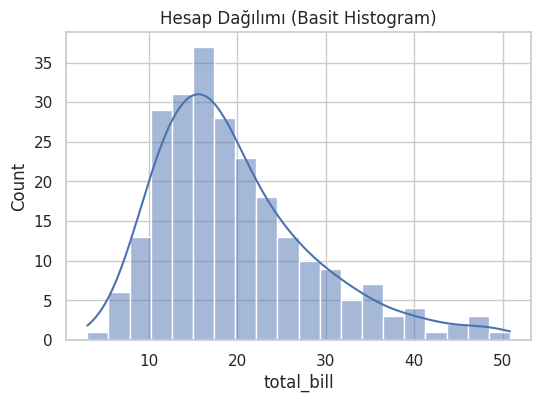

In [40]:

plt.figure(figsize=(6, 4))
sns.histplot(data=augmented, x="total_bill", bins=20, color="#4C72B0", kde=True)
plt.title("Hesap Dağılımı (Basit Histogram)")
plt.show()



### Çoklu Grafik Paneli – Kompleks Senaryo


/tmp/ipykernel_5733/1236155111.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=augmented, x="day", y="total_bill", ax=axes[1], palette="pastel")


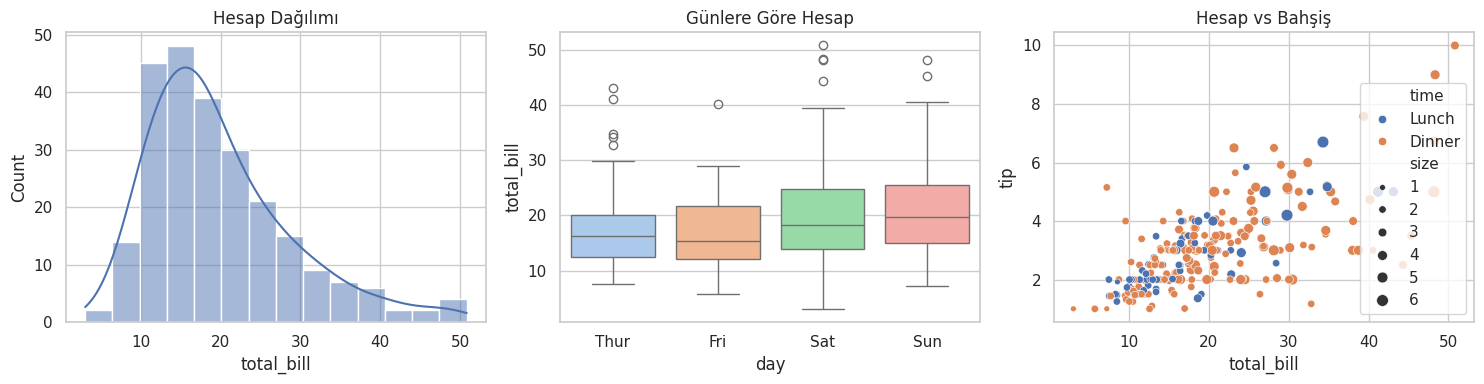

In [23]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(data=augmented, x="total_bill", kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Hesap Dağılımı")

sns.boxplot(data=augmented, x="day", y="total_bill", ax=axes[1], palette="pastel")
axes[1].set_title("Günlere Göre Hesap")

sns.scatterplot(data=augmented, x="total_bill", y="tip", hue="time", size="size", ax=axes[2])
axes[2].set_title("Hesap vs Bahşiş")
plt.tight_layout()
plt.show()



## Dağılım ve Uç Değer Analizi
Violin ve strip grafikleri yoğunluk + uç değerleri aynı karede gösterir.


/tmp/ipykernel_5733/2749825928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=augmented, x="smoker", y="tip", inner="quartile", palette="muted")


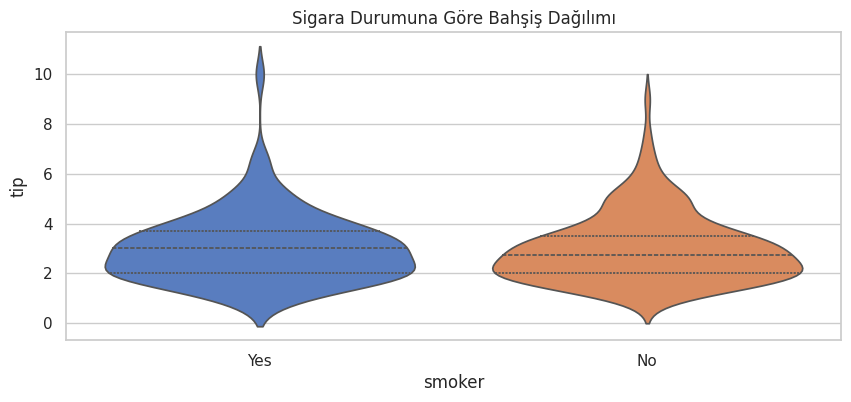

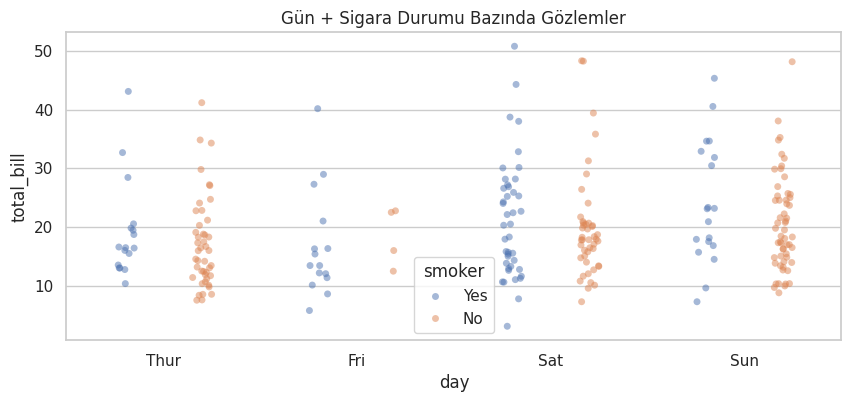

In [24]:

plt.figure(figsize=(10, 4))
sns.violinplot(data=augmented, x="smoker", y="tip", inner="quartile", palette="muted")
plt.title("Sigara Durumuna Göre Bahşiş Dağılımı")
plt.show()

plt.figure(figsize=(10, 4))
sns.stripplot(data=augmented, x="day", y="total_bill", hue="smoker", dodge=True, alpha=0.5)
plt.title("Gün + Sigara Durumu Bazında Gözlemler")
plt.show()


## Korelasyon ve Çoklu Değişken İncelemesi (Teori)
Pearson korelasyonu:
$$\rho_{XY} = \frac{\operatorname{Cov}(X,Y)}{\sigma_X \sigma_Y}$$
👉 **Kontrol Noktası:** Korelasyon nedensellik değildir; bağlamla birlikte yorumlayın.


### `corr` – Temel Kullanım


In [25]:

correlation_tip_bill = tips["total_bill"].corr(tips["tip"])
print(f"toplam hesap vs bahşiş korelasyonu: {correlation_tip_bill:.2f}")


toplam hesap vs bahşiş korelasyonu: 0.68



### Korelasyon Matrisi ve Isı Haritası – Kompleks İnceleme


Korelasyon matrisi:


,total_bill,tip,size,tip_rate
total_bill,1.00,0.68,0.60,-0.34
tip,0.68,1.00,0.49,0.34
size,0.60,0.49,1.00,-0.14
tip_rate,-0.34,0.34,-0.14,1.00


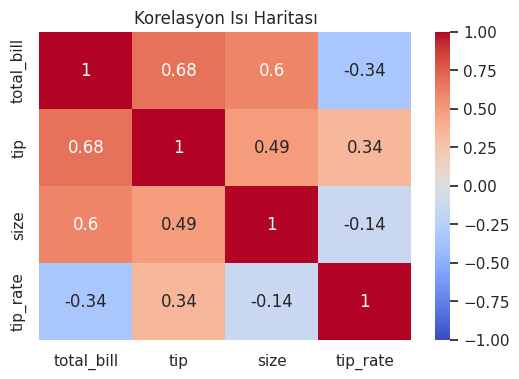

In [26]:

numeric_cols = ["total_bill", "tip", "size", "tip_rate"]
corr = augmented[numeric_cols].corr()
print("Korelasyon matrisi:")
display(corr.round(2))

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Isı Haritası")
plt.show()


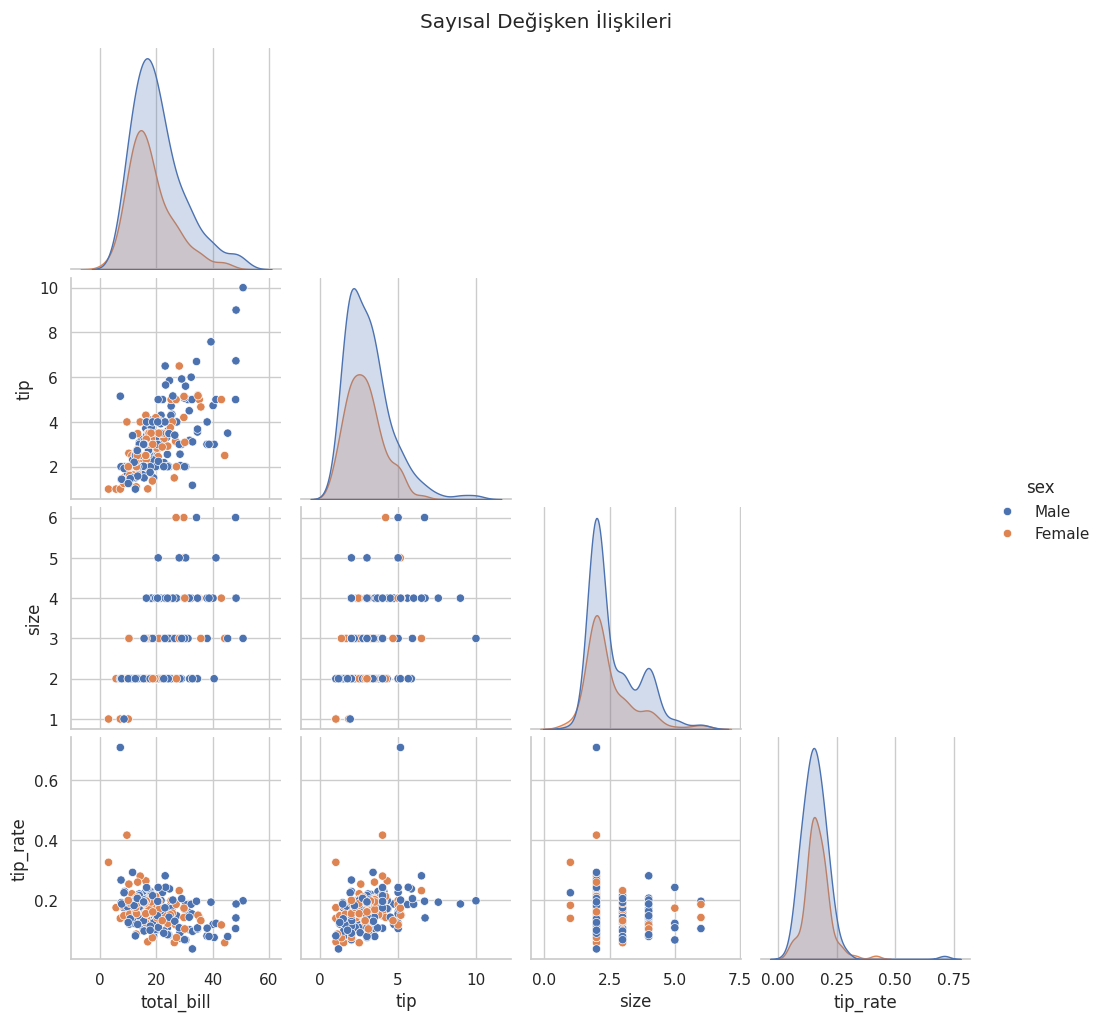

In [27]:

sns.pairplot(augmented[numeric_cols + ["sex"]], hue="sex", corner=True)
plt.suptitle("Sayısal Değişken İlişkileri", y=1.02)
plt.show()


## İstatistiksel Çıkarım Teorisi
%95 güven aralığı:
$$\bar{x} \pm z_{\alpha/2} \frac{s}{\sqrt{n}}$$
Burada \(z_{\alpha/2}\) standart normal tablodan gelir.

In [28]:

from math import sqrt

sample = augmented["tip_rate"].dropna()
mean_tip_rate = sample.mean()
std_tip_rate = sample.std(ddof=1)
n = sample.shape[0]
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
margin = z * std_tip_rate / sqrt(n)
print(f"Bahşiş oranı ortalaması: {mean_tip_rate:.3f}")
print(f"%95 güven aralığı: ({mean_tip_rate - margin:.3f}, {mean_tip_rate + margin:.3f})")


Bahşiş oranı ortalaması: 0.161
%95 güven aralığı: (0.153, 0.168)


## Basit Modelleme: Lineer Regresyonun Teorik Özeti
- Model: $$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots$$
- Normal denklem: $$\hat{\beta} = (X^T X)^{-1} X^T y$$
- Değerlendirme:
  - MAE: $$\frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$
  - R²: Açıklanan varyans oranı.
👉 **Kontrol Noktası:** Katsayıların işaretleri beklentinizle uyumlu mu?

In [29]:

model_df = augmented[["total_bill", "size", "tip"]].dropna()
X = model_df[["total_bill", "size"]]
y = model_df["tip"]

reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)

mae = mean_absolute_error(y, pred)
r2 = r2_score(y, pred)

print("Katsayılar:")
for col, coef in zip(X.columns, reg.coef_):
    print(f"  {col}: {coef:.3f}")
print(f"Sabit (intercept): {reg.intercept_:.3f}")
print(f"MAE: {mae:.3f}, R²: {r2:.3f}")


Katsayılar:
  total_bill: 0.093
  size: 0.193
Sabit (intercept): 0.669
MAE: 0.739, R²: 0.468



## Model Yorumlama ve Hikayeleştirme
- Katsayılar, diğer değişkenler sabitken hedef değişkendeki beklenen değişimi temsil eder.
- R² düşükse modelin açıklama gücü sınırlıdır; veri setinin karmaşıklığına işaret edebilir.
- İçgörüleri hikayeleştirirken karar alıcıya doğrudan öneri sunun.



## Uygulamalı Egzersizler (30 Dakika)
1. **Veri Temizleme:** `tips` verisine sentetik eksik değer ekleyip doldurun; stratejinizi açıklayın.
2. **Segment Analizi:** Hafta içi/sonu ve sigara içen/içmeyen segmentleri için bahşiş oranlarını tablo + grafikle kıyaslayın.
3. **Yeni Özellik:** Bahşişin "cömert" sayılması için kendi eşiğinizi belirleyin, segmentler arası farkı ölçün.
4. **Mini Model:** `tip_rate` hedefiyle tek değişkenli lineer regresyon kurup katsayıyı yorumlayın.



## Kapanış ve Sonraki Adımlar
- Notebook'u kendi veri setinizle tekrar çalıştırarak fonksiyonları pekiştirin.
- Çıkan içgörüleri kısa özetler halinde yazıp ekibe paylaşın.
- Sonraki aşamalar: özellik seçimi, model değerlendirme protokolleri, deney tasarımı.
